# Fifa19 Exercise - Solutions

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [Fifa19 Dataset](https://www.kaggle.com/winterbreeze/fifa19eda) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

#### Read fifa_eda.csv 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("fifa_eda - fifa_eda.csv")
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


### New Part Visualiztion Questions

#### Draw the outliers of players value

/home/ramy/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

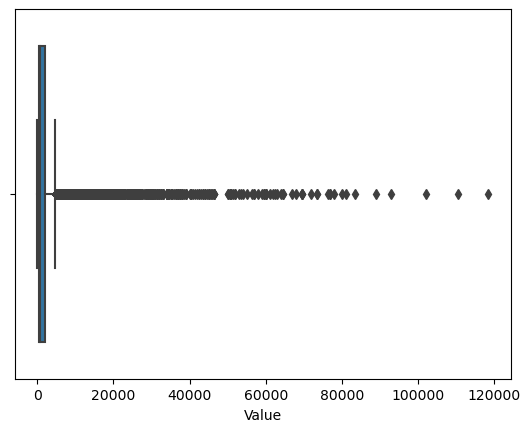

In [2]:
sns.boxplot(df["Value"])

#### find the average wage for each Nationality and draw the outliers in value for the top 5 nationality

In [23]:
x=df.groupby('Nationality')['Value'].mean().sort_values(ascending=False).head()
x.index
df_n = df[df['Nationality'].isin(x.index)]
df_n['Nationality'].value_counts()

Egypt                   31
Gabon                   15
Central African Rep.     3
Dominican Republic       2
United Arab Emirates     1
Name: Nationality, dtype: int64

<AxesSubplot:xlabel='Nationality', ylabel='Value'>

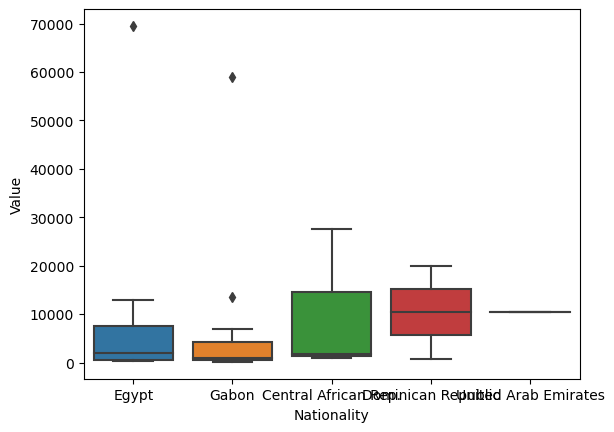

In [26]:
sns.boxplot(data=df_n, x='Nationality',y='Value')

#### Draw the distripution of players Height

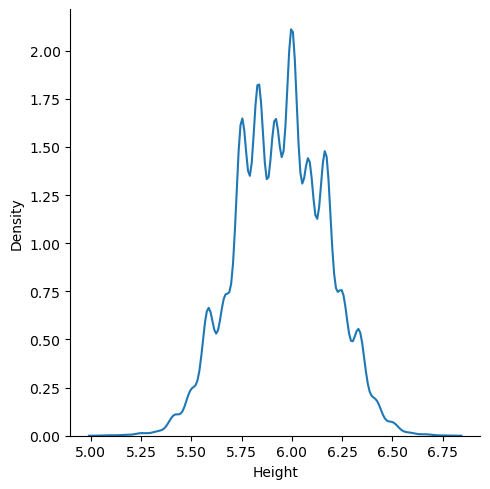

In [29]:
sns.displot(df["Height"] ,kind="kde")

#### What are the top 10 clubs in the wage and visualize the results ?

In [54]:
y=df.groupby('Club')['Wage'].mean().sort_values(ascending=False).head(10)
y.index
df_y = df[df['Club'].isin(y.index)]
y.values

array([152.03030303, 146.57575758, 131.68      , 113.36363636,
       102.75757576,  98.45454545,  87.93939394,  79.48484848,
        78.82758621,  78.42424242])

<AxesSubplot:xlabel='Club', ylabel='Wage'>

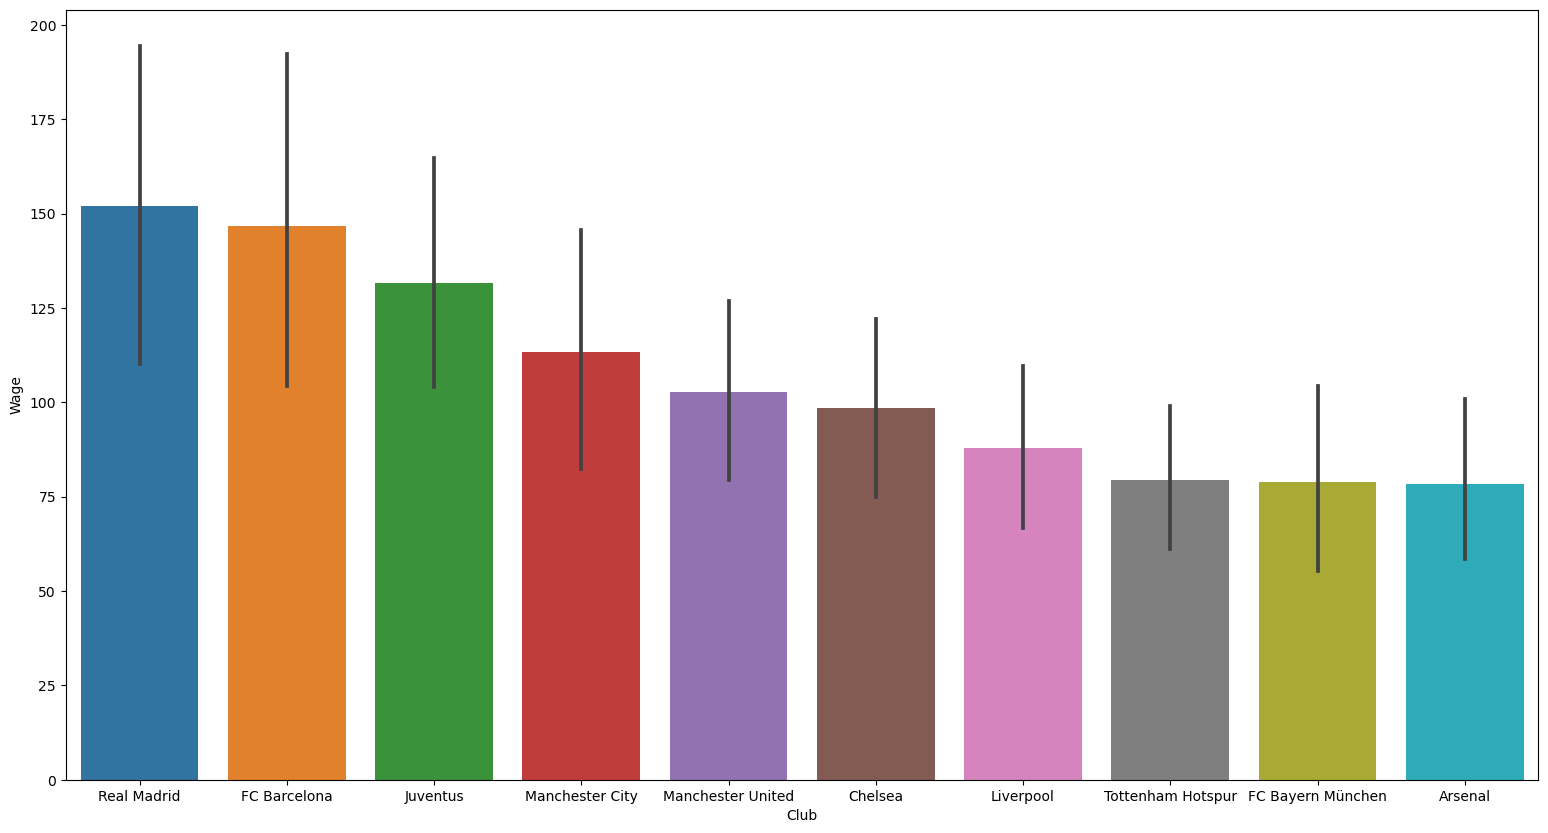

In [61]:
plt.figure(figsize = (19,10))
sns.barplot(data = df_y , x="Club",y="Wage" , order=y.index)

#### is there any outlier in the Age find it with 1- visualization 2-  with pandas ?

<AxesSubplot:xlabel='Age'>

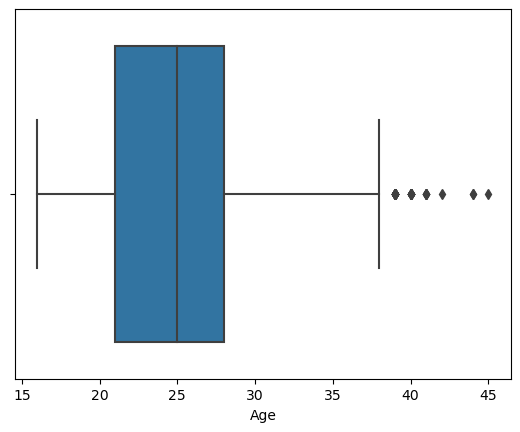

In [65]:
sns.boxplot(data=df, x='Age')

In [70]:
df['Age'].describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

#### Is there a correlation between Value and Overall and viusalize the results with two graphs?**

In [72]:
x= df[['Value','Overall']]
x.corr()

,Value,Overall
Value,1.000000,0.631848
Overall,0.631848,1.000000


<AxesSubplot:>

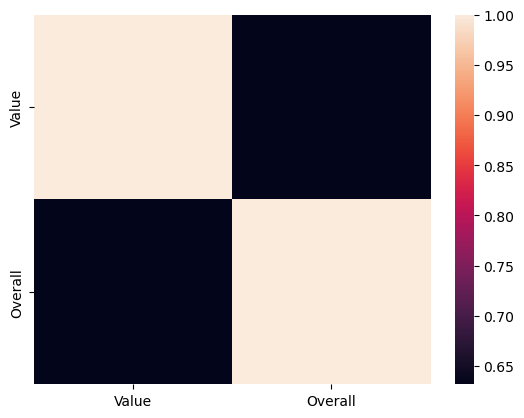

In [73]:
sns.heatmap(x.corr())

#### what are the ratio of the Preferred Foot and visualize with a graph ?

In [75]:
z = df['Preferred Foot'].value_counts()

/home/ramy/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

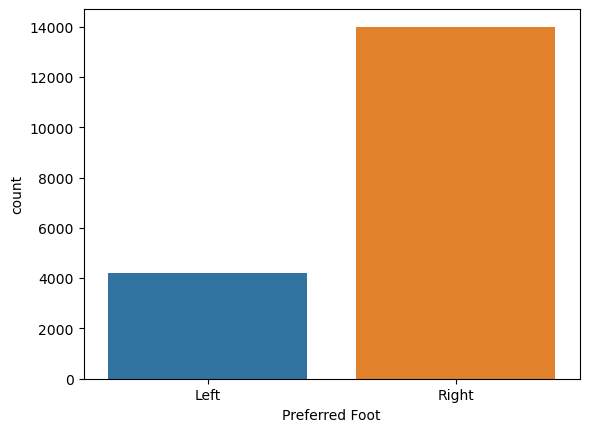

In [79]:
sns.countplot(df['Preferred Foot'])

#### what are the top 10 average overall clubs and visualize with a graph ?

In [85]:
a=df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
a.index
m = df[df['Club'].isin(a.index)]

<AxesSubplot:xlabel='Club', ylabel='Overall'>

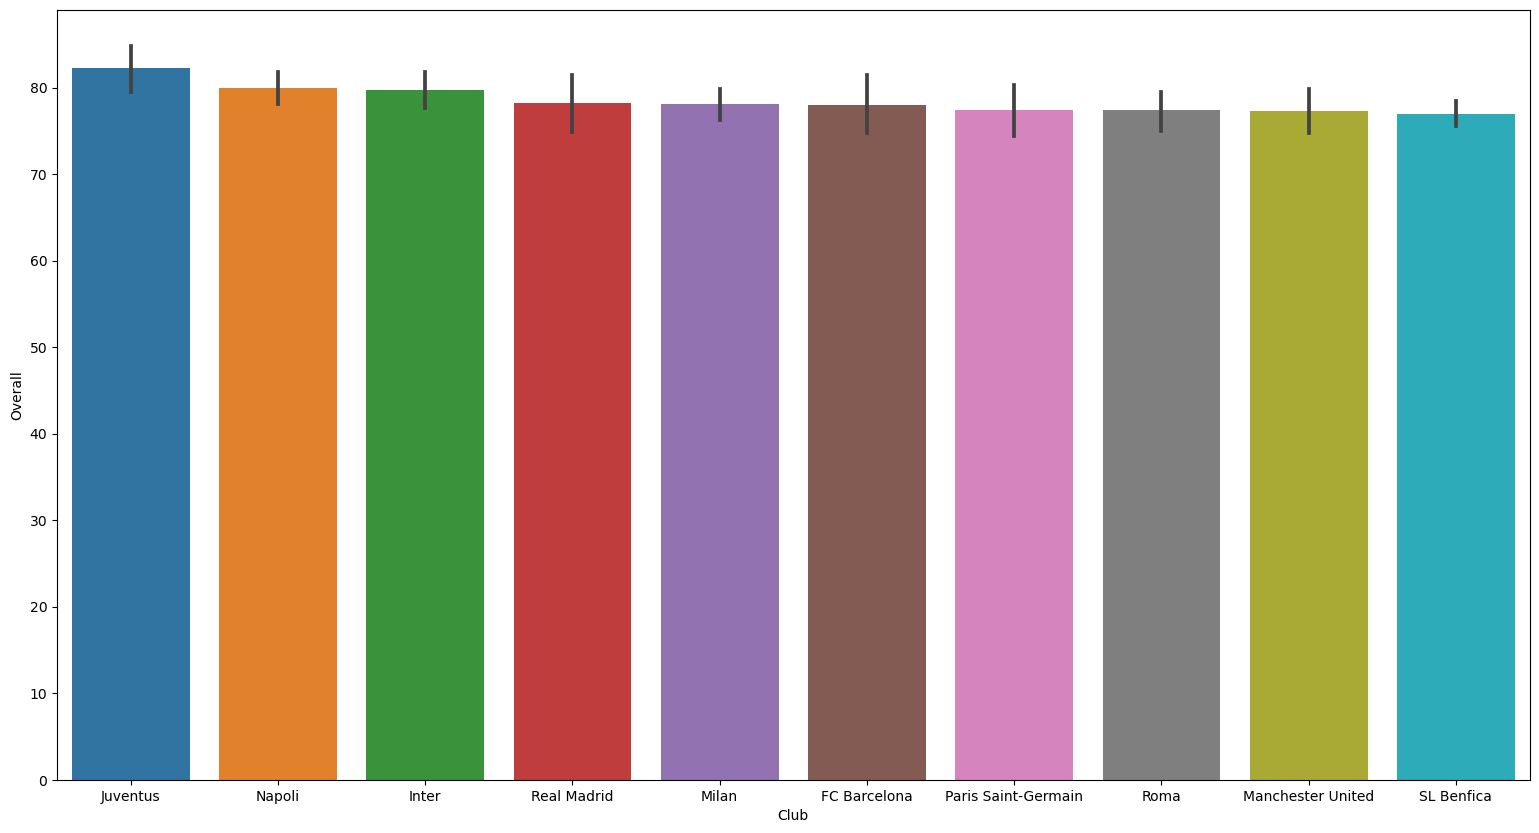

In [93]:
plt.figure(figsize = (19,10))

sns.barplot(data = m , x="Club",y="Overall", order=a.index)

**What are the top 5 most common nationality and visualize them with a graph?**

In [102]:
s = df['Nationality'].value_counts().head()
s.index
g = df[df['Nationality'].isin(s.index)]

<AxesSubplot:xlabel='Nationality', ylabel='count'>

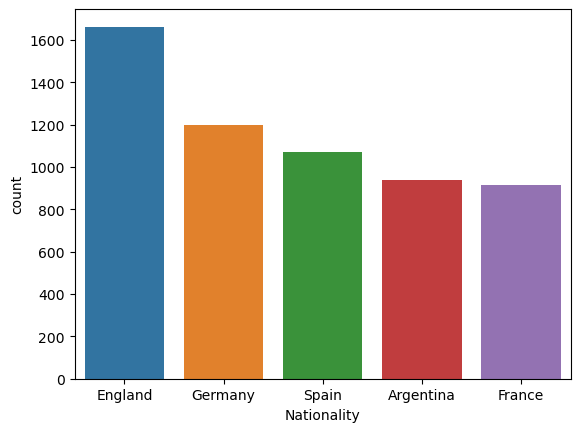

In [111]:
sns.countplot(data=g,x='Nationality',order=s.index)

# Great Job!